In [152]:
# Load libraries
import pandas as pd
from sklearn.ensemble import RandomForestClassifier # Import RandomForest Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [153]:
batting_data = pd.read_csv('batting_data.csv')
batting_data.head()

,IDfg,Season,Name,Team,Age,G,AB,PA,H,1B,...,maxEV,HardHit,HardHit%,Events,CStr%,CSW%,xBA,xSLG,xwOBA,L-WAR
0,1109,2002,Barry Bonds,SFG,37,143,403,612,149,70,...,NaN,NaN,NaN,0,0.127,0.191,NaN,NaN,NaN,12.7
2,1109,2001,Barry Bonds,SFG,36,153,476,664,156,49,...,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,12.5
1,1109,2004,Barry Bonds,SFG,39,147,373,617,135,60,...,NaN,NaN,NaN,0,0.124,0.164,NaN,NaN,NaN,11.9
21,15640,2022,Aaron Judge,NYY,30,157,570,696,177,87,...,118.4,246.0,0.609,404,0.169,0.287,NaN,NaN,NaN,11.3
33,13611,2018,Mookie Betts,BOS,25,136,520,614,180,96,...,110.6,217.0,0.500,434,0.220,0.270,NaN,NaN,NaN,10.4


Clean data:

In [154]:
null_count = batting_data.isnull().sum()
null_count

IDfg         0
Season       0
Name         0
Team         0
Age          0
          ... 
CSW%      1222
xBA       7455
xSLG      7455
xwOBA     7455
L-WAR        0
Length: 320, dtype: int64

In [155]:
no_missing_cols = list(batting_data.columns[null_count == 0])
no_missing_cols

['IDfg',
 'Season',
 'Name',
 'Team',
 'Age',
 'G',
 'AB',
 'PA',
 'H',
 '1B',
 '2B',
 '3B',
 'HR',
 'R',
 'RBI',
 'BB',
 'IBB',
 'SO',
 'HBP',
 'SF',
 'SH',
 'GDP',
 'SB',
 'CS',
 'AVG',
 'BB%',
 'K%',
 'BB/K',
 'OBP',
 'SLG',
 'OPS',
 'ISO',
 'BABIP',
 'wOBA',
 'wRAA',
 'wRC',
 'Bat',
 'Rep',
 'Pos',
 'RAR',
 'WAR',
 'Spd',
 'wRC+',
 'WPA',
 '-WPA',
 '+WPA',
 'RE24',
 'REW',
 'pLI',
 'PH',
 'WPA/LI',
 'Clutch',
 'BsR',
 'Def',
 'wSB',
 'Age Rng',
 'Off',
 'Lg',
 'TTO%',
 'AVG+',
 'BB%+',
 'K%+',
 'OBP+',
 'SLG+',
 'ISO+',
 'BABIP+',
 'Events',
 'L-WAR']

In [156]:
# get rid of all columns that have missing data
batting_data = batting_data[no_missing_cols].copy()
batting_data

,IDfg,Season,Name,Team,Age,G,AB,PA,H,1B,...,TTO%,AVG+,BB%+,K%+,OBP+,SLG+,ISO+,BABIP+,Events,L-WAR
0,1109,2002,Barry Bonds,SFG,37,143,403,612,149,70,...,0.475,139,347,47,171,189,273,111,0,12.7
2,1109,2001,Barry Bonds,SFG,36,153,476,664,156,49,...,0.517,122,298,82,152,196,313,89,0,12.5
1,1109,2004,Barry Bonds,SFG,39,147,373,617,135,60,...,0.515,134,416,41,179,186,269,104,0,11.9
21,15640,2022,Aaron Judge,NYY,30,157,570,696,177,87,...,0.500,128,200,113,137,175,251,117,404,11.3
33,13611,2018,Mookie Betts,BOS,25,136,520,614,180,96,...,0.332,139,159,68,137,154,176,125,434,10.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7237,595,1999,Mike Caruso,CHW,22,136,529,564,132,115,...,0.103,91,38,41,81,67,29,87,0,-2.7
7143,319,2011,Adam Dunn,CHW,31,122,415,496,66,39,...,0.530,62,187,199,90,68,78,82,0,-2.9
7377,620,2002,Neifi Perez,KCR,29,145,554,585,131,104,...,0.130,89,41,56,79,71,42,87,0,-2.9
7378,728,1999,Cristian Guzman,MIN,21,131,420,456,95,79,...,0.248,82,51,126,77,63,30,93,0,-3.1


In [157]:
batting_data.dtypes

IDfg        int64
Season      int64
Name       object
Team       object
Age         int64
           ...   
SLG+        int64
ISO+        int64
BABIP+      int64
Events      int64
L-WAR     float64
Length: 68, dtype: object

In [158]:
batting_data.dtypes[batting_data.dtypes == "object"]

Name       object
Team       object
Age Rng    object
dtype: object

In [159]:
batting_data['Age Rng']

0       37 - 37
2       36 - 36
1       39 - 39
21      30 - 30
33      25 - 25
         ...   
7237    22 - 22
7143    31 - 31
7377    29 - 29
7378    21 - 21
1232    27 - 27
Name: Age Rng, Length: 7455, dtype: object

In [160]:
# delete columns that use strings
del batting_data["Age Rng"]
del batting_data["Team"]

In [161]:
# Splits dataframe into groups based on ID, computing next home runs for the next season
def next_season(player):
    player = player.sort_values("Season")
    player["Next_Season_HR"] = player["HR"].shift(-1)
    return player

batting_data = batting_data.groupby("IDfg", group_keys=False).apply(next_season)

In [162]:
batting_data['Next_Season_HR']

6145     2.0
5587     3.0
5830     NaN
3319    21.0
2553    35.0
        ... 
2632    14.0
3659    14.0
2375     NaN
1799     NaN
6668     NaN
Name: Next_Season_HR, Length: 7455, dtype: float64

In [163]:
batting_data[["Name", "Season", "Next_Season_HR", "HR"]]

,Name,Season,Next_Season_HR,HR
6145,Alfredo Amezaga,2006,2.0,3
5587,Alfredo Amezaga,2007,3.0,2
5830,Alfredo Amezaga,2008,NaN,3
3319,Garret Anderson,1998,21.0,15
2553,Garret Anderson,1999,35.0,21
...,...,...,...,...
2632,Devon White,1998,14.0,22
3659,Devon White,1999,14.0,14
2375,Devon White,2001,NaN,14
1799,Mark Whiten,1998,NaN,6


In [164]:
# drops rows where "Next_AVG" is null
batting_data = batting_data.dropna().copy()
batting_data[["Name", "Season", "Next_Season_HR", "HR"]]

,Name,Season,Next_Season_HR,HR
6145,Alfredo Amezaga,2006,2.0,3
5587,Alfredo Amezaga,2007,3.0,2
3319,Garret Anderson,1998,21.0,15
2553,Garret Anderson,1999,35.0,21
2533,Garret Anderson,2000,28.0,35
...,...,...,...,...
2889,Quilvio Veras,1999,5.0,6
1016,Quilvio Veras,2000,3.0,5
3031,Walt Weiss,1998,2.0,0
2632,Devon White,1998,14.0,22


In [165]:
batting_data.head()

,IDfg,Season,Name,Age,G,AB,PA,H,1B,2B,...,AVG+,BB%+,K%+,OBP+,SLG+,ISO+,BABIP+,Events,L-WAR,Next_Season_HR
6145,1,2006,Alfredo Amezaga,28,132,334,378,87,72,9,...,96,98,74,97,75,42,97,0,1.1,2.0
5587,1,2007,Alfredo Amezaga,29,133,400,448,105,80,14,...,96,88,71,95,82,58,96,0,2.0,3.0
3319,2,1998,Garret Anderson,26,156,622,658,183,120,41,...,108,50,75,96,105,100,105,0,0.6,21.0
2553,2,1999,Garret Anderson,27,157,620,660,188,129,36,...,110,55,78,97,107,101,105,0,2.4,35.0
2533,2,2000,Garret Anderson,28,159,647,681,185,107,40,...,104,37,82,88,117,139,93,0,2.2,28.0


In [166]:
#No data before 2015
del batting_data["Events"]

In [167]:
batting_data['20_Or_More_HR_Next_Season'] = batting_data['Next_Season_HR'].apply(lambda x: 1 if x > 19 else 0)

In [168]:
batting_data.head()

,IDfg,Season,Name,Age,G,AB,PA,H,1B,2B,...,AVG+,BB%+,K%+,OBP+,SLG+,ISO+,BABIP+,L-WAR,Next_Season_HR,20_Or_More_HR_Next_Season
6145,1,2006,Alfredo Amezaga,28,132,334,378,87,72,9,...,96,98,74,97,75,42,97,1.1,2.0,0
5587,1,2007,Alfredo Amezaga,29,133,400,448,105,80,14,...,96,88,71,95,82,58,96,2.0,3.0,0
3319,2,1998,Garret Anderson,26,156,622,658,183,120,41,...,108,50,75,96,105,100,105,0.6,21.0,1
2553,2,1999,Garret Anderson,27,157,620,660,188,129,36,...,110,55,78,97,107,101,105,2.4,35.0,1
2533,2,2000,Garret Anderson,28,159,647,681,185,107,40,...,104,37,82,88,117,139,93,2.2,28.0,1


In [169]:
batting_data[["Name", "Season", "Next_Season_HR", "HR", "20_Or_More_HR_Next_Season"]]

,Name,Season,Next_Season_HR,HR,20_Or_More_HR_Next_Season
6145,Alfredo Amezaga,2006,2.0,3,0
5587,Alfredo Amezaga,2007,3.0,2,0
3319,Garret Anderson,1998,21.0,15,1
2553,Garret Anderson,1999,35.0,21,1
2533,Garret Anderson,2000,28.0,35,1
...,...,...,...,...,...
2889,Quilvio Veras,1999,5.0,6,0
1016,Quilvio Veras,2000,3.0,5,0
3031,Walt Weiss,1998,2.0,0,0
2632,Devon White,1998,14.0,22,0


In [170]:
batting_data[["Name", "Season", "Next_Season_HR", "HR", "20_Or_More_HR_Next_Season"]]

,Name,Season,Next_Season_HR,HR,20_Or_More_HR_Next_Season
6145,Alfredo Amezaga,2006,2.0,3,0
5587,Alfredo Amezaga,2007,3.0,2,0
3319,Garret Anderson,1998,21.0,15,1
2553,Garret Anderson,1999,35.0,21,1
2533,Garret Anderson,2000,28.0,35,1
...,...,...,...,...,...
2889,Quilvio Veras,1999,5.0,6,0
1016,Quilvio Veras,2000,3.0,5,0
3031,Walt Weiss,1998,2.0,0,0
2632,Devon White,1998,14.0,22,0


In [171]:
batting_data_cleaned = batting_data.copy()

## Random Forest:

In [216]:
#split dataset in features and target variable
feature_cols = [ 'Age', 'G', 'AB', 'PA', 'H', '1B', '2B', '3B',
       'R', 'RBI', 'BB', 'IBB', 'SO', 'HBP', 'SF', 'SH', 'GDP', 'SB', 'CS',
       'AVG', 'BB%', 'K%', 'BB/K', 'OBP', 'SLG', 'OPS', 'ISO', 'BABIP', 'wOBA',
       'wRAA', 'wRC', 'Bat', 'Rep', 'Pos', 'RAR', 'WAR', 'Spd', 'wRC+', 'WPA',
       '-WPA', '+WPA', 'RE24', 'REW', 'pLI', 'PH', 'WPA/LI', 'Clutch', 'BsR',
       'Def', 'wSB', 'Off', 'Lg', 'TTO%', 'AVG+', 'BB%+', 'K%+', 'OBP+',
       'SLG+', 'ISO+', 'BABIP+', 'L-WAR']
X = batting_data_cleaned[feature_cols] # Features
y = batting_data_cleaned['20_Or_More_HR_Next_Season'] # Target variable

In [217]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
# 70% training and 30% test

In [219]:
forest = RandomForestClassifier()
forest.fit(X_train, y_train)
y_test_pred=forest.predict(X_test)
y_train_pred=forest.predict(X_train)
forest_train = metrics.accuracy_score(y_train, y_train_pred)
forest_test = metrics.accuracy_score(y_test, y_test_pred)
# Model Accuracy, how often is the classifier correct?
print("Accuracy of testing:",metrics.accuracy_score(y_test, y_test_pred))
print(f"Random forest train / test accuracies: {forest_train} / {forest_test}")

Accuracy of testing: 0.7718006795016987
Random forest train / test accuracies: 1.0 / 0.7718006795016987


Overfitting above

In [220]:
forest = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=1)
forest.fit(X_train, y_train)
y_test_pred=forest.predict(X_test)
y_train_pred=forest.predict(X_train)
forest_train = metrics.accuracy_score(y_train, y_train_pred)
forest_test = metrics.accuracy_score(y_test, y_test_pred)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_test_pred))
print(f"Random forest train / test accuracies: {forest_train} / {forest_test}")

Accuracy: 0.7706681766704416
Random forest train / test accuracies: 0.9395484340859432 / 0.7706681766704416


In [221]:
forest = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=1)
forest.fit(X_train, y_train)
y_test_pred=forest.predict(X_test)
y_train_pred=forest.predict(X_train)
forest_train = metrics.accuracy_score(y_train, y_train_pred)
forest_test = metrics.accuracy_score(y_test, y_test_pred)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_test_pred))
print(f"Random forest train / test accuracies: {forest_train} / {forest_test}")

Accuracy: 0.7644394110985278
Random forest train / test accuracies: 0.7766448167030833 / 0.7644394110985278


In [222]:
forest = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
forest.fit(X_train, y_train)
y_test_pred=forest.predict(X_test)
y_train_pred=forest.predict(X_train)
forest_train = metrics.accuracy_score(y_train, y_train_pred)
forest_test = metrics.accuracy_score(y_test, y_test_pred)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_test_pred))
print(f"Random forest train / test accuracies: {forest_train} / {forest_test}")

RF_F1 = metrics.f1_score(y_test, y_test_pred)
print(RF_F1)

Accuracy: 0.7774631936579841
Random forest train / test accuracies: 0.7992231124059238 / 0.7774631936579841
0.6066066066066066


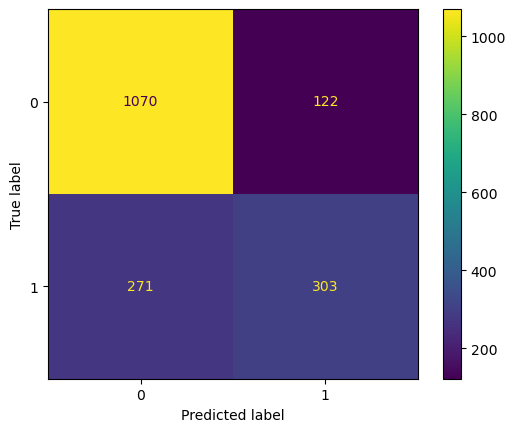

In [223]:
from sklearn.metrics import confusion_matrix #to get access to confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay# to get a display

conf_mat = confusion_matrix(y_test, y_test_pred)
cm_display = ConfusionMatrixDisplay(conf_mat).plot()

In [224]:
#evaluation metrics
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.80      0.90      0.84      1192
           1       0.71      0.53      0.61       574

    accuracy                           0.78      1766
   macro avg       0.76      0.71      0.73      1766
weighted avg       0.77      0.78      0.77      1766



In [225]:
ones_count = batting_data_cleaned['20_Or_More_HR_Next_Season'].value_counts().get(1, 0)
total_rows = batting_data_cleaned['20_Or_More_HR_Next_Season'].shape[0]

pct = ones_count / total_rows
print(pct)


0.3160577740016992


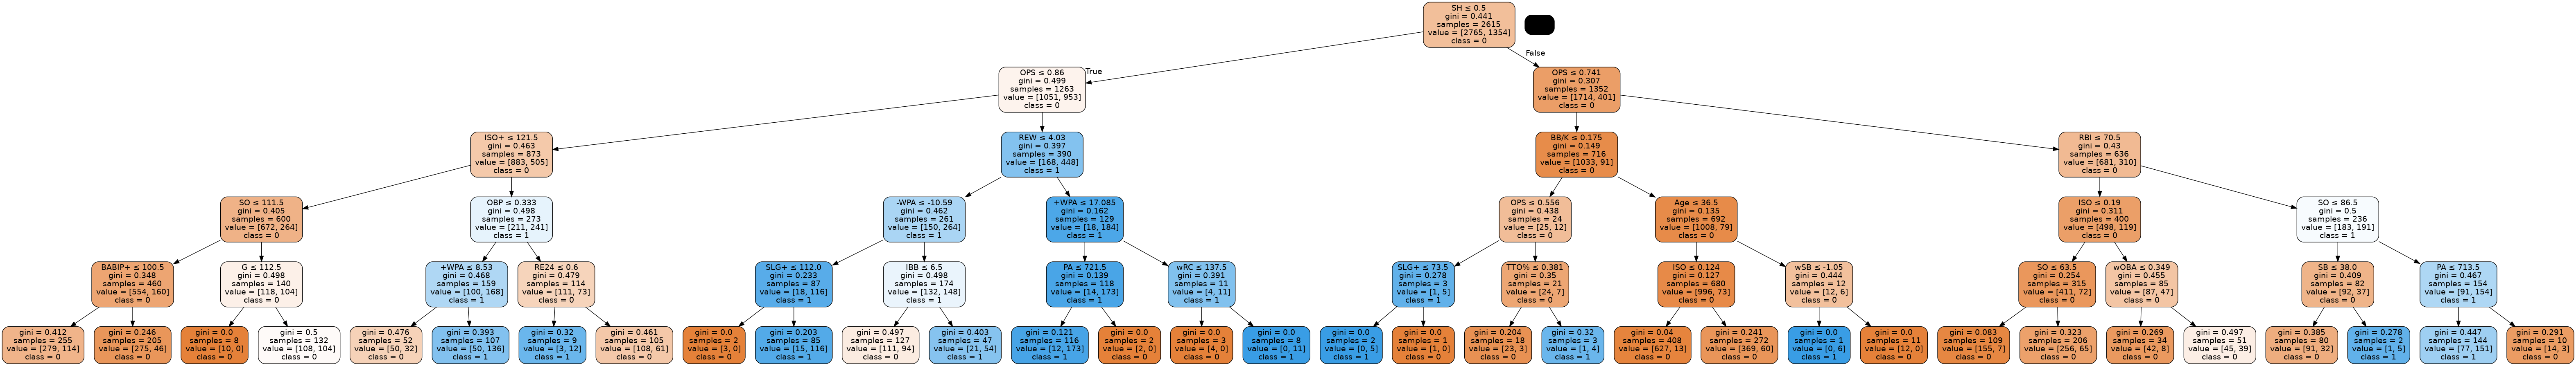

In [226]:
#can see any of the estimators you made
estimator = forest.estimators_[10]#extract a single tree
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(estimator, out_file=dot_data,
filled=True, rounded=True,
special_characters=True, feature_names =
feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('baseball.png')
Image(graph.create_png())

## Decision Trees:

In [182]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [183]:
#split dataset in features and target variable
feature_cols2 = [ 'Age', 'G', 'AB', 'PA', 'H', '1B', '2B', '3B',
       'R', 'RBI', 'BB', 'IBB', 'SO', 'HBP', 'SF', 'SH', 'GDP', 'SB', 'CS',
       'AVG', 'BB%', 'K%', 'BB/K', 'OBP', 'SLG', 'OPS', 'ISO', 'BABIP', 'wOBA',
       'wRAA', 'wRC', 'Bat', 'Rep', 'Pos', 'RAR', 'WAR', 'Spd', 'wRC+', 'WPA',
       '-WPA', '+WPA', 'RE24', 'REW', 'pLI', 'PH', 'WPA/LI', 'Clutch', 'BsR',
       'Def', 'wSB', 'Off', 'Lg', 'TTO%', 'AVG+', 'BB%+', 'K%+', 'OBP+',
       'SLG+', 'ISO+', 'BABIP+', 'L-WAR']
X2 = batting_data_cleaned[feature_cols2] # Features
y2 = batting_data_cleaned['20_Or_More_HR_Next_Season'] # Target variable

In [184]:
# Split dataset into training set and test set
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.3, random_state=1)
# 70% training and 30% test

In [185]:
# Create Decision Tree classifer object
dtc2 = DecisionTreeClassifier()

# Train Decision Tree Classifer
model2 = dtc2.fit(X_train2,y_train2)

In [186]:
#Predict the response for test dataset
y_pred2 = dtc2.predict(X_test2)

In [187]:
#predict the response for the training set
train_predict2 = dtc2.predict(X_train2)

In [188]:
# Model Accuracy, how often is the classifier correct?
# Are you overfitting?
print("Accuracy train:",metrics.accuracy_score(y_train2, train_predict2))
print("Accuracy test:",metrics.accuracy_score(y_test2, y_pred2))

Accuracy train: 1.0
Accuracy test: 0.6998867497168743


Overfitting

In [189]:
# Create Decision Tree classifer object
dtc2 = DecisionTreeClassifier(criterion="entropy", max_depth=4)

# Train Decision Tree Classifer
model2 = dtc2.fit(X_train2,y_train2)

#Predict the response for test dataset
y_pred2 = dtc2.predict(X_test2)

#predict the response for the training set
train_predict2 = dtc2.predict(X_train2)

# Model Accuracy, how often is the classifier correct?
# Are you overfitting?
print("Accuracy train:",metrics.accuracy_score(y_train2, train_predict2))
print("Accuracy test:",metrics.accuracy_score(y_test2, y_pred2))


Accuracy train: 0.7829570284049526
Accuracy test: 0.7797281993204983


In [190]:
from sklearn import model_selection
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt #so you can draw
import numpy as np

In [191]:
def lookAtModels(models):
    results=[]
    names=[]
    for name, model in models:
        skfold = KFold(n_splits=10)
        cv_results= cross_val_score(model, X_train2, y_train2, cv=skfold, scoring='f1')
        results.append(cv_results)
        names.append(name)
        print(f'{name}: {cv_results.mean()} ({cv_results.std()})')
    return names, results#not sure why I want lists yet

In [192]:
#make all your models
models =[]
for d in range(2,9):
    models.append((f'Tree depth {d}',DecisionTreeClassifier(criterion="entropy",max_depth=d)))
               


In [193]:
#see your results
names,results = lookAtModels(models)

Tree depth 2: 0.4470434962195676 (0.029275942177622066)
Tree depth 3: 0.547816879150614 (0.05229501918540336)
Tree depth 4: 0.5567254091192796 (0.03901645573284478)
Tree depth 5: 0.5409864047280335 (0.054256567738776386)
Tree depth 6: 0.571916058601394 (0.05117778472321797)
Tree depth 7: 0.545922531179796 (0.0537375333103761)
Tree depth 8: 0.5449739898955936 (0.05216941734053043)


In [194]:
D2_mean = np.mean(results[0])
D2_std= np.std(results[0])
D3_mean = np.mean(results[1])
D3_std = np.std(results[1])
D4_mean = np.mean(results[2])
D4_std = np.std(results[2])
D5_mean = np.mean(results[3])
D5_std = np.std(results[3])
D6_mean = np.mean(results[4])
D6_std = np.std(results[4])
D7_mean = np.mean(results[5])
D7_std = np.std(results[5])
D8_mean = np.mean(results[6])
D8_std = np.std(results[6])

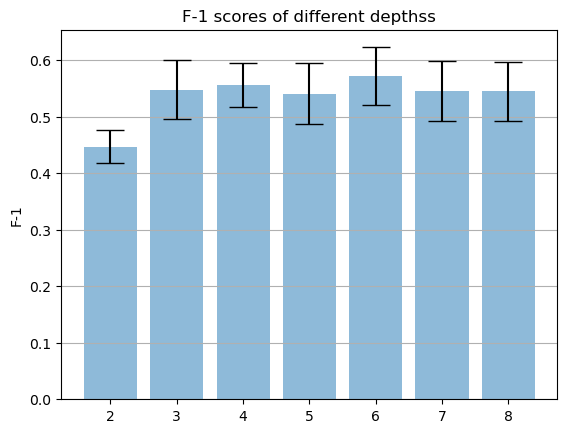

In [195]:
#lists for plot – I bet there is a better way to do this
depth =['2','3','4','5','6','7','8']
x_pos = np.arange(len(depth))
#print(x_pos)
Means = [D2_mean,D3_mean,D4_mean,D5_mean,D6_mean,D7_mean,D8_mean]
error = [D2_std,D3_std,D4_std,D5_std,D6_std,D7_std,D8_std]
# Build the plot
fig, ax = plt.subplots()
ax.bar(x_pos, Means, yerr=error, align='center', alpha=0.5, ecolor='black',
capsize=10)
ax.set_ylabel('F-1')
ax.set_xticks(x_pos)
ax.set_xticklabels(depth)
ax.set_title('F-1 scores of different depthss')
ax.yaxis.grid(True)

In [196]:
# Create Decision Tree classifer object
dtc2 = DecisionTreeClassifier(criterion="entropy", max_depth=6)

# Train Decision Tree Classifer
model2 = dtc2.fit(X_train2,y_train2)

#Predict the response for test dataset
y_pred2 = dtc2.predict(X_test2)

#predict the response for the training set
train_predict2 = dtc2.predict(X_train2)

# Model Accuracy, how often is the classifier correct?
# Are you overfitting?
print("Accuracy train:",metrics.accuracy_score(y_train2, train_predict2))
print("Accuracy test:",metrics.accuracy_score(y_test2, y_pred2))


DT_F1 = metrics.f1_score(y_test2, y_pred2)
print(DT_F1)

Accuracy train: 0.8033503277494537
Accuracy test: 0.7621744054360136
0.5945945945945946


Evaluation metrics:

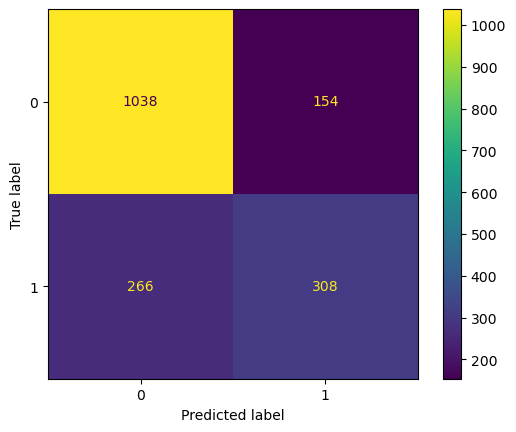

In [197]:
conf_mat = confusion_matrix(y_test2, y_pred2)
cm_display = ConfusionMatrixDisplay(conf_mat).plot()

In [198]:
#evaluation metrics
print(metrics.classification_report(y_test2, y_pred2))

              precision    recall  f1-score   support

           0       0.80      0.87      0.83      1192
           1       0.67      0.54      0.59       574

    accuracy                           0.76      1766
   macro avg       0.73      0.70      0.71      1766
weighted avg       0.75      0.76      0.75      1766



## KNN

In [199]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
import matplotlib.pyplot as plt #so you can draw

In [200]:
batting_data_cleaned.head()

,IDfg,Season,Name,Age,G,AB,PA,H,1B,2B,...,AVG+,BB%+,K%+,OBP+,SLG+,ISO+,BABIP+,L-WAR,Next_Season_HR,20_Or_More_HR_Next_Season
6145,1,2006,Alfredo Amezaga,28,132,334,378,87,72,9,...,96,98,74,97,75,42,97,1.1,2.0,0
5587,1,2007,Alfredo Amezaga,29,133,400,448,105,80,14,...,96,88,71,95,82,58,96,2.0,3.0,0
3319,2,1998,Garret Anderson,26,156,622,658,183,120,41,...,108,50,75,96,105,100,105,0.6,21.0,1
2553,2,1999,Garret Anderson,27,157,620,660,188,129,36,...,110,55,78,97,107,101,105,2.4,35.0,1
2533,2,2000,Garret Anderson,28,159,647,681,185,107,40,...,104,37,82,88,117,139,93,2.2,28.0,1


In [201]:
del batting_data_cleaned["Season"]
del batting_data_cleaned["IDfg"]
del batting_data_cleaned["Name"]

In [202]:
# Import module to standardize the scale
from sklearn.preprocessing import StandardScaler
# Create instance (i.e. object) of the standard scaler
scaler = StandardScaler()

scaler.fit(batting_data_cleaned.drop('20_Or_More_HR_Next_Season', axis=1))
# Use scaler object to conduct a transform
scaled_features = scaler.transform(batting_data_cleaned.drop('20_Or_More_HR_Next_Season',axis=1))#this does the standardization

In [203]:
#Here we have the normalized dataset, minus the target/output column which is the last col
batting_data_numerical = pd.DataFrame(scaled_features, columns= batting_data_cleaned.columns[:-1])
#see what you did
batting_data_numerical.head()

,Age,G,AB,PA,H,1B,2B,3B,HR,R,...,TTO%,AVG+,BB%+,K%+,OBP+,SLG+,ISO+,BABIP+,L-WAR,Next_Season_HR
0,-0.123048,0.123265,-1.019750,-0.996026,-0.955949,-0.309170,-1.688777,0.170253,-1.250054,-0.963831,...,-0.974815,-0.586435,-0.104708,-0.772300,-0.481889,-1.706628,-1.742321,-0.410359,-0.544444,-1.308081
1,0.137997,0.163029,-0.462937,-0.472723,-0.492154,-0.016798,-1.160007,2.551093,-1.345470,-0.799559,...,-1.199020,-0.586435,-0.370969,-0.872704,-0.670085,-1.289172,-1.303369,-0.501665,-0.094402,-1.212534
2,-0.645139,1.077601,1.409979,1.097189,1.517627,1.445061,1.695354,1.757479,-0.105063,-0.142471,...,-1.336035,0.500405,-1.382761,-0.738832,-0.575987,0.082468,-0.151120,0.320092,-0.794468,0.507318
3,-0.384094,1.117365,1.393106,1.112140,1.646459,1.773979,1.166584,-0.226554,0.467433,0.925296,...,-1.111829,0.681545,-1.249630,-0.638428,-0.481889,0.201741,-0.123686,0.320092,0.105618,1.844981
4,-0.123048,1.196893,1.620893,1.269131,1.569159,0.969956,1.589600,0.170253,1.803256,1.089568,...,-1.012183,0.138125,-1.728900,-0.504556,-1.328769,0.798106,0.918825,-0.775584,0.005608,1.176150


In [204]:
#split dataset in features and target variable

X = batting_data_numerical # Features
y = batting_data_cleaned['20_Or_More_HR_Next_Season'] # Target variable
X = X.to_numpy()
y = y.to_numpy()


#Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
# 70% training and 30% test

In [205]:
def varyK(k, distMetric):
    results = []
    for i in range(1, k+1):
        model = KNeighborsClassifier(n_neighbors=i, metric=distMetric)
        model.fit(X_train,y_train)
        y_test_pred = model.predict(X_test)
        results.append(metrics.f1_score(y_test, y_test_pred))
    return results


In [206]:
def varyWeightedK(k, distMetric):
    results = []
    for i in range(1, k+1):
        model = KNeighborsClassifier(n_neighbors=i,weights='distance', metric=distMetric)
        model.fit(X_train,y_train)
        y_test_pred = model.predict(X_test)
        results.append(metrics.f1_score(y_test, y_test_pred))
    return results

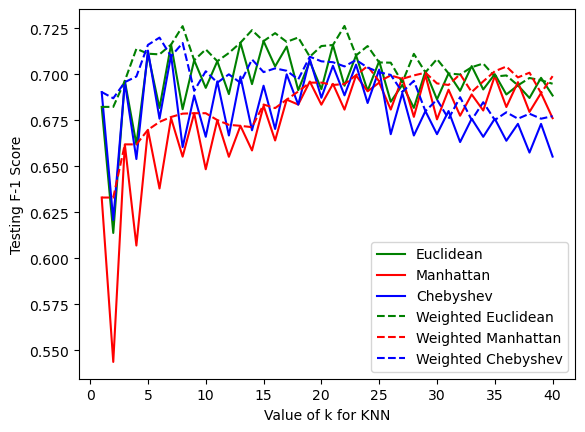

In [207]:
EucAccuracy = varyK(40, 'euclidean')
ManAccuracy = varyK(40, 'manhattan')
ChedAccuracy = varyK(40,'chebyshev' )
EucAccuracyWeighted = varyWeightedK(40, 'euclidean')
ManAccuracyWeighted = varyWeightedK(40, 'manhattan')
ChedAccuracyWeighted = varyWeightedK(40,'chebyshev' )
kneighbors = [*range(1, 41)]
fig, ax = plt.subplots()
ax.plot(kneighbors, EucAccuracy, color='green', label='Euclidean')
ax.plot(kneighbors, ManAccuracy, color='red', label='Manhattan')
ax.plot(kneighbors, ChedAccuracy, color='blue', label='Chebyshev')
ax.plot(kneighbors, EucAccuracyWeighted, color='green', label='Weighted Euclidean', linestyle='dashed')
ax.plot(kneighbors, ManAccuracyWeighted, color='red', label='Weighted Manhattan', linestyle='dashed')
ax.plot(kneighbors, ChedAccuracyWeighted, color='blue', label='Weighted Chebyshev', linestyle='dashed')
plt.xlabel('Value of k for KNN')
plt.ylabel('Testing F-1 Score')
ax.legend(loc= 'lower right')
plt.show()

In [208]:
for count, value in enumerate(EucAccuracyWeighted):
    print(f'k: {count} accuracy:{value}')
print(f'best k: {EucAccuracyWeighted.index(max(EucAccuracyWeighted))} '
      f' acc: {EucAccuracyWeighted[EucAccuracyWeighted.index(max(EucAccuracyWeighted))]}')

k: 0 accuracy:0.6822107081174438
k: 1 accuracy:0.6822107081174438
k: 2 accuracy:0.6963636363636364
k: 3 accuracy:0.7137745974955276
k: 4 accuracy:0.7111111111111112
k: 5 accuracy:0.7107438016528925
k: 6 accuracy:0.7160493827160493
k: 7 accuracy:0.726078799249531
k: 8 accuracy:0.7075743048897412
k: 9 accuracy:0.7134615384615384
k: 10 accuracy:0.7070312499999999
k: 11 accuracy:0.7115009746588693
k: 12 accuracy:0.7170923379174853
k: 13 accuracy:0.7239024390243902
k: 14 accuracy:0.717948717948718
k: 15 accuracy:0.7222767419038272
k: 16 accuracy:0.7175421209117938
k: 17 accuracy:0.7199211045364893
k: 18 accuracy:0.7094861660079052
k: 19 accuracy:0.7152709359605912
k: 20 accuracy:0.7158308751229105
k: 21 accuracy:0.7262021589793917
k: 22 accuracy:0.7101879327398615
k: 23 accuracy:0.7152709359605912
k: 24 accuracy:0.7063492063492064
k: 25 accuracy:0.7062314540059348
k: 26 accuracy:0.6954773869346734
k: 27 accuracy:0.7110228401191657
k: 28 accuracy:0.7009900990099011
k: 29 accuracy:0.708209693

In [209]:
eucKNN = KNeighborsClassifier(n_neighbors=21, metric='euclidean', weights='distance')
eucKNN.fit(X_train,y_train)
y_predKNN = eucKNN.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("F-1 Score:",metrics.f1_score(y_test, y_predKNN))

KNN_F1 = metrics.f1_score(y_test, y_predKNN)
print(KNN_F1)

F-1 Score: 0.7158308751229105
0.7158308751229105


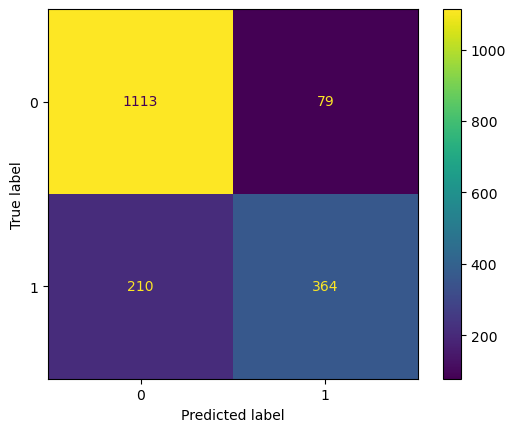

In [210]:
conf_mat = confusion_matrix(y_test, y_predKNN)
cm_display = ConfusionMatrixDisplay(conf_mat).plot()

In [211]:
#evaluation metrics
print(metrics.classification_report(y_test,y_predKNN))

              precision    recall  f1-score   support

           0       0.84      0.93      0.89      1192
           1       0.82      0.63      0.72       574

    accuracy                           0.84      1766
   macro avg       0.83      0.78      0.80      1766
weighted avg       0.83      0.84      0.83      1766



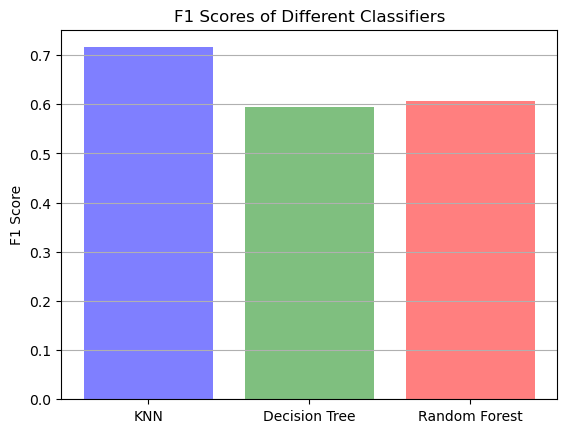

In [215]:
#lists for plot
classifiers =['KNN', 'Decision Tree', 'Random Forest']
x_pos = np.arange(len(classifiers))
#print(x_pos)
F1_scores = [KNN_F1, DT_F1, RF_F1]

# Build the plot
fig, ax = plt.subplots()
ax.bar(x_pos, F1_scores, align='center', alpha=0.5, color=['blue', 'green', 'red'])
ax.set_ylabel('F1 Score')
ax.set_xticks(x_pos)
ax.set_xticklabels(classifiers)
ax.set_title('F1 Scores of Different Classifiers')
ax.yaxis.grid(True)

plt.show()